In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [33]:
%pip install numpy==1.25.2 pandas==1.5.3 matplotlib==3.7.1 seaborn==0.13.1 scikit-learn==1.2.2 sklearn-pandas==2.2.0 -q --user
%pip install opendatasets pandas numpy scikit-learn xgboost lightgbm tabulate statsmodels

Note: you may need to restart the kernel to use updated packages.
   ---------------------------------------- 0.0/9.9 MB ? eta -:--:--
   ---------------------------------------- 0.1/9.9 MB 1.6 MB/s eta 0:00:07
   -- ------------------------------------- 0.6/9.9 MB 7.4 MB/s eta 0:00:02
   ------ --------------------------------- 1.5/9.9 MB 12.0 MB/s eta 0:00:01
   ------------ --------------------------- 3.0/9.9 MB 17.4 MB/s eta 0:00:01
   ----------------- ---------------------- 4.2/9.9 MB 19.3 MB/s eta 0:00:01
   ----------------------- ---------------- 5.8/9.9 MB 21.8 MB/s eta 0:00:01
   ----------------------------- ---------- 7.2/9.9 MB 22.8 MB/s eta 0:00:01
   ----------------------------------- ---- 8.7/9.9 MB 24.2 MB/s eta 0:00:01
   ---------------------------------------  9.9/9.9 MB 25.2 MB/s eta 0:00:01
   ---------------------------------------- 9.9/9.9 MB 24.2 MB/s eta 0:00:00
   ---------------------------------------- 0.0/233.9 kB ? eta -:--:--
   -----------------------

# Outline of this notebook:

## Exploratory Data Analysis (EDA): 
Exploration of the dataset through visualization and analyzation to summarize thier main characteristic and gives us a insight on the dataset.

* [Quick Peak](#Quick-Peak)
* [Quantitative Data & Qualitative Data](#Quantitative-Data-&-Qualitative-Data)
* [Missing Values](#Missing-Value)
* [Multicollinearity](#Multicollinearity)

## [Data Processing](#Data-Processing): 
Manipulate explored and analyzed data to convert them into meaningful information that can be use the models or estimators.

* [Imputing Missing Values](#Imputing-Missing-Values)
* [Normalization of Dependant Variable (revenue)](#Normalization-of-Dependant-Variable-(revenue))
* [Adding New Features](#Adding-New-Features)
* [Eliminating Biased Features](#Eliminating-Biased-Features)
* [Create Dummy Variables](#Create-Dummy-Variables)

## [Models Building](#Model-Building):
****Find the optimised parameters for all the models. Evaluate high performance mode and use them for ensemble regression****

* [Train Test Split](#Train-Test-Split)
* [GridSearchCV Best Parameters for All Models](#GridSearchCV-Best-Parameters-for-All-Models)
* [Evaluate All Optimized Estimators](#Evaluate-All-Optimized-Estimators)
* [Ensemble Models with VotingRegressor](#Ensemble-Models-with-VotingRegressor)
* [Submission](#Submission)

These models are:

1. Ridge
1. Lasso
1. Elastic Net
1. HuberRegressor
1. RandomForestRegressor
1. ExtraTreeRegressor
1. BaggingRegressor
1. XGBRegressor
1. DecisionTreeRegressor
1. AdaBoostRegressor
1. GradientBoostRegressor

In [5]:
### import necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt #Visualization packages
#import missingno as msno
import seaborn as sns
import warnings
warnings.filterwarnings('ignore') ## ignore all warnings

In [8]:
## Lead the train and test dataset
df_train = pd.read_csv("Train_dataset.csv")
df_test = pd.read_csv("Test_dataset.csv")

### Quick Peak

In [9]:
## Take a quick peak on the train data
df_train.head()

,Registration Number,Annual Turnover,Cuisine,City,Restaurant Location,Opening Day of Restaurant,Facebook Popularity Quotient,Endorsed By,Instagram Popularity Quotient,Fire Audit,...,Overall Restaurant Rating,Live Music Rating,Comedy Gigs Rating,Value Deals Rating,Live Sports Rating,Ambience,Lively,Service,Comfortablility,Privacy
0,60001,42000000,"indian,irish",Bangalore,Near Business Hub,14-02-2009,84.3,Not Specific,95.8,1,...,10.0,4.0,NaN,NaN,NaN,8.0,8,6,6,6
1,60002,50000000,"indian,irish",Indore,Near Party Hub,29-09-2008,85.4,Tier A Celebrity,85.0,1,...,9.0,NaN,4.0,NaN,NaN,5.0,7,7,3,8
2,60003,32500000,"tibetan,italian",Chennai,Near Business Hub,30-07-2011,85.0,Tier A Celebrity,68.2,1,...,8.0,3.0,NaN,NaN,NaN,7.0,10,5,2,8
3,60004,110000000,"turkish,nigerian",Gurgaon,Near Party Hub,30-11-2008,85.6,Tier A Celebrity,83.6,0,...,9.0,6.0,NaN,NaN,NaN,7.0,7,4,3,5
4,60005,20000000,"irish,belgian",Manesar,Near Party Hub,22-02-2010,NaN,Tier A Celebrity,76.8,1,...,6.0,NaN,2.0,NaN,NaN,NaN,6,2,4,6


In [10]:
## Shape of train data
df_train.shape

(3493, 34)

The train data has a total of 137 rows and 43 columns. "revenue" feature would be this dataset dependant variables, the rest of the features are independant variables expect "Id" feature (We will remove this later)

In [11]:
## Take a quick peak on the test data
df_test.head()

,Registration Number,Cuisine,City,Restaurant Location,Opening Day of Restaurant,Facebook Popularity Quotient,Endoresed By,Instagram Popularity Quotient,Fire Audit,Liquor License Obtained,...,Overall Restaurant Rating,Live Music Rating,Comedy Gigs Rating,Value Deals Rating,Live Sports Rating,Ambience,Lively,Service,Comfortablility,Privacy
0,20001,"tibetan,italian",Bangalore,Near Business Hub,13-07-2010,78.00,Tier A Celebrity,69.00,1,1,...,6.0,NaN,2.0,NaN,NaN,5,2,2,6,0
1,20002,"tibetan,italian",Hyderabad,Near Party Hub,05-09-2011,89.17,Not Specific,96.00,1,1,...,9.0,3.0,NaN,NaN,6.0,7,8,5,1,8
2,20003,"algerian,belgian",Hyderabad,Near Party Hub,12-04-2011,84.00,Not Specific,86.00,1,1,...,6.0,3.0,NaN,NaN,NaN,9,7,5,1,5
3,20004,"tibetan,greek",-1,Near Party Hub,16-01-2005,79.38,Not Specific,74.40,0,1,...,9.0,6.0,NaN,NaN,NaN,6,7,6,4,7
4,20005,"cuban,british",Pune,Near Party Hub,10-11-2008,84.67,Not Specific,86.46,1,1,...,NaN,NaN,NaN,NaN,NaN,4,4,7,7,3


In [12]:
## Shape of test data
df_test.shape

(500, 33)

The test data has a total fo 100000 rows and 42 columns.

In [13]:
## All features
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3493 entries, 0 to 3492
Data columns (total 34 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Registration Number            3493 non-null   int64  
 1   Annual Turnover                3493 non-null   int64  
 2   Cuisine                        3493 non-null   object 
 3   City                           3493 non-null   object 
 4   Restaurant Location            3493 non-null   object 
 5   Opening Day of Restaurant      3493 non-null   object 
 6   Facebook Popularity Quotient   3394 non-null   float64
 7   Endorsed By                    3493 non-null   object 
 8   Instagram Popularity Quotient  3437 non-null   float64
 9   Fire Audit                     3493 non-null   int64  
 10  Liquor License Obtained        3493 non-null   int64  
 11  Situated in a Multi Complex    3493 non-null   int64  
 12  Dedicated Parking              3493 non-null   i

### Data Description (Referred from [here](https://www.kaggle.com/c/restaurant-revenue-prediction/data))
* Id : Restaurant id. 
* Open Date : opening date for a restaurant
* City : City that the restaurant is in. Note that there are unicode in the names. 
* City Group: Type of the city. Big cities, or Other. 
* Type: Type of the restaurant. FC: Food Court, IL: Inline, DT: Drive Thru, MB: Mobile
* P1, P2 - P37: There are three categories of these obfuscated data. Demographic data are gathered from third party providers with GIS systems. These include population in any given area, age and gender distribution, development scales. Real estate data mainly relate to the m2 of the location, front facade of the location, car park availability. Commercial data mainly include the existence of points of interest including schools, banks, other QSR operators.
* Revenue: The revenue column indicates a (transformed) revenue of the restaurant in a given year and is the target of predictive analysis. Please note that the values are transformed so they don't mean real dollar values. 

In [15]:
## drop the Id columns
df_train = df_train.drop("Registration Number",axis=1)

### Quantitative Data & Qualitative Data
1. Quantitative data is the type of data ****whose value is measured in the form of numbers or counts, with a unique numerical value associated with each data set****
1. Qualitative data is defined as the data that ****approximates and characterizes****

In [17]:
quantitative_feats = [i for i in df_train if df_train[i].dtype != object]
qualitative_feats = [i for i in df_train if df_train[i].dtype == object]

print("Quantitative_features: {}".format(quantitative_feats))
print("Qualtative_features: {}".format(qualitative_feats))

Quantitative_features: ['Annual Turnover', 'Facebook Popularity Quotient', 'Instagram Popularity Quotient', 'Fire Audit', 'Liquor License Obtained', 'Situated in a Multi Complex', 'Dedicated Parking', 'Open Sitting Available', 'Resturant Tier', 'Restaurant Zomato Rating', 'Restaurant City Tier', 'Order Wait Time', 'Staff Responsivness', 'Value for Money', 'Hygiene Rating', 'Food Rating', 'Overall Restaurant Rating', 'Live Music Rating', 'Comedy Gigs Rating', 'Value Deals Rating', 'Live Sports Rating', 'Ambience', 'Lively', 'Service', 'Comfortablility', 'Privacy']
Qualtative_features: ['Cuisine', 'City', 'Restaurant Location', 'Opening Day of Restaurant', 'Endorsed By', 'Restaurant Type', 'Restaurant Theme']


There a total of 38 quantitaive features and 4 qualitative features.

In [18]:
## remove the dependant variables out 
quantitative_feats.remove("Annual Turnover")

## remove "Open Date"(Temporal variable) out 
qualitative_feats.remove("Opening Day of Restaurant")

### Temporal variable
The Open Date features present its data in a form of MM/DD/YY (for example: 01/22/2011), we extract the months and years out using the Code below.

In [19]:
## dependant variable 
revenue = df_train["Annual Turnover"]

TypeError: barplot() takes from 0 to 1 positional arguments but 2 positional arguments (and 2 keyword-only arguments) were given

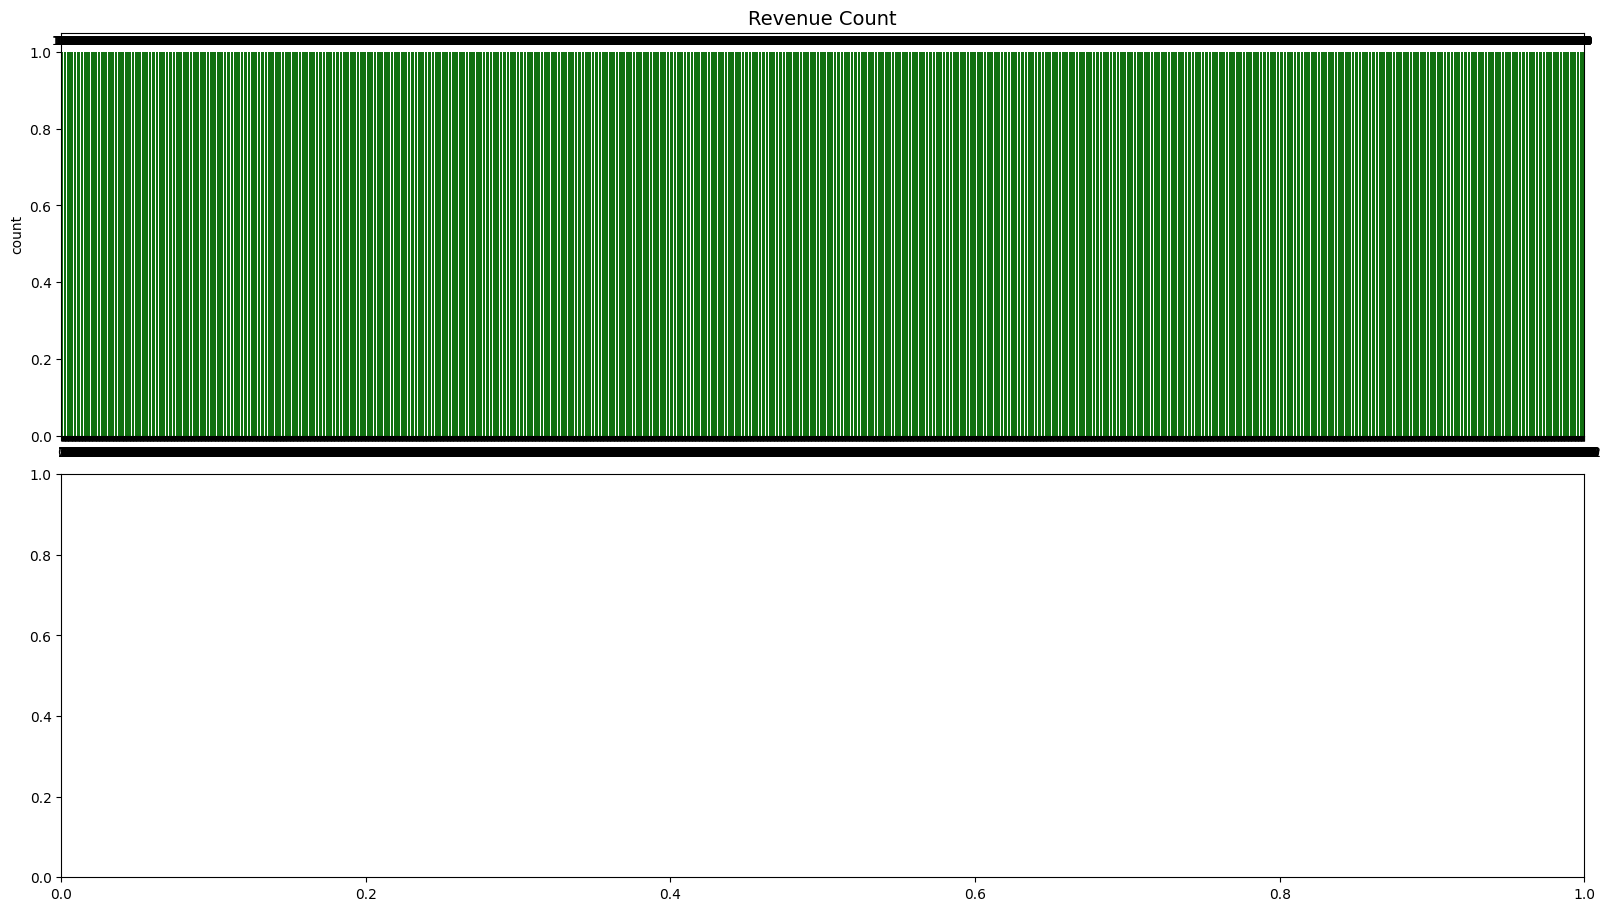

In [25]:
## months extraction
month = pd.DataFrame()
df_train['Opening Day of Restaurant'] =  pd.to_datetime(df_train['Opening Day of Restaurant'], format='%d-%m-%Y')
month["months"] = df_train["Opening Day of Restaurant"].dt.month
month = pd.concat([month,revenue],axis=1)

## revenue based on months
revenue_month = month.groupby("months")["Annual Turnover"].median()


### Visualization
fig, ax = plt.subplots(2,1,sharey=False,figsize=(16,9),constrained_layout=True)

bar_1 = sns.countplot(month["months"],ax=ax[0],color="green") ## Number of Revenue based on month
for i in bar_1.patches: #label each rectangle
    height = i.get_height()
    ax[0].text(i.get_x()+i.get_width()/2,height*1.02,height,ha="center",fontsize=9)
ax[0].set_title("Revenue Count",fontsize=14)

bar_2 = sns.barplot(revenue_month.index,revenue_month.values,ax=ax[1],color="red") ## Median Revenue
for i in bar_2.patches: #label each rectangle
    height = i.get_height()
    ax[1].text(i.get_x()+i.get_width()/2,height*1.02,height,ha="center",fontsize=10)
ax[1].set_title("Median Revenue",fontsize=14)

From the median revenue chart, we can see that September month has the highest revenue while July month has the lowest revenue. 

TypeError: barplot() takes from 0 to 1 positional arguments but 2 positional arguments (and 2 keyword-only arguments) were given

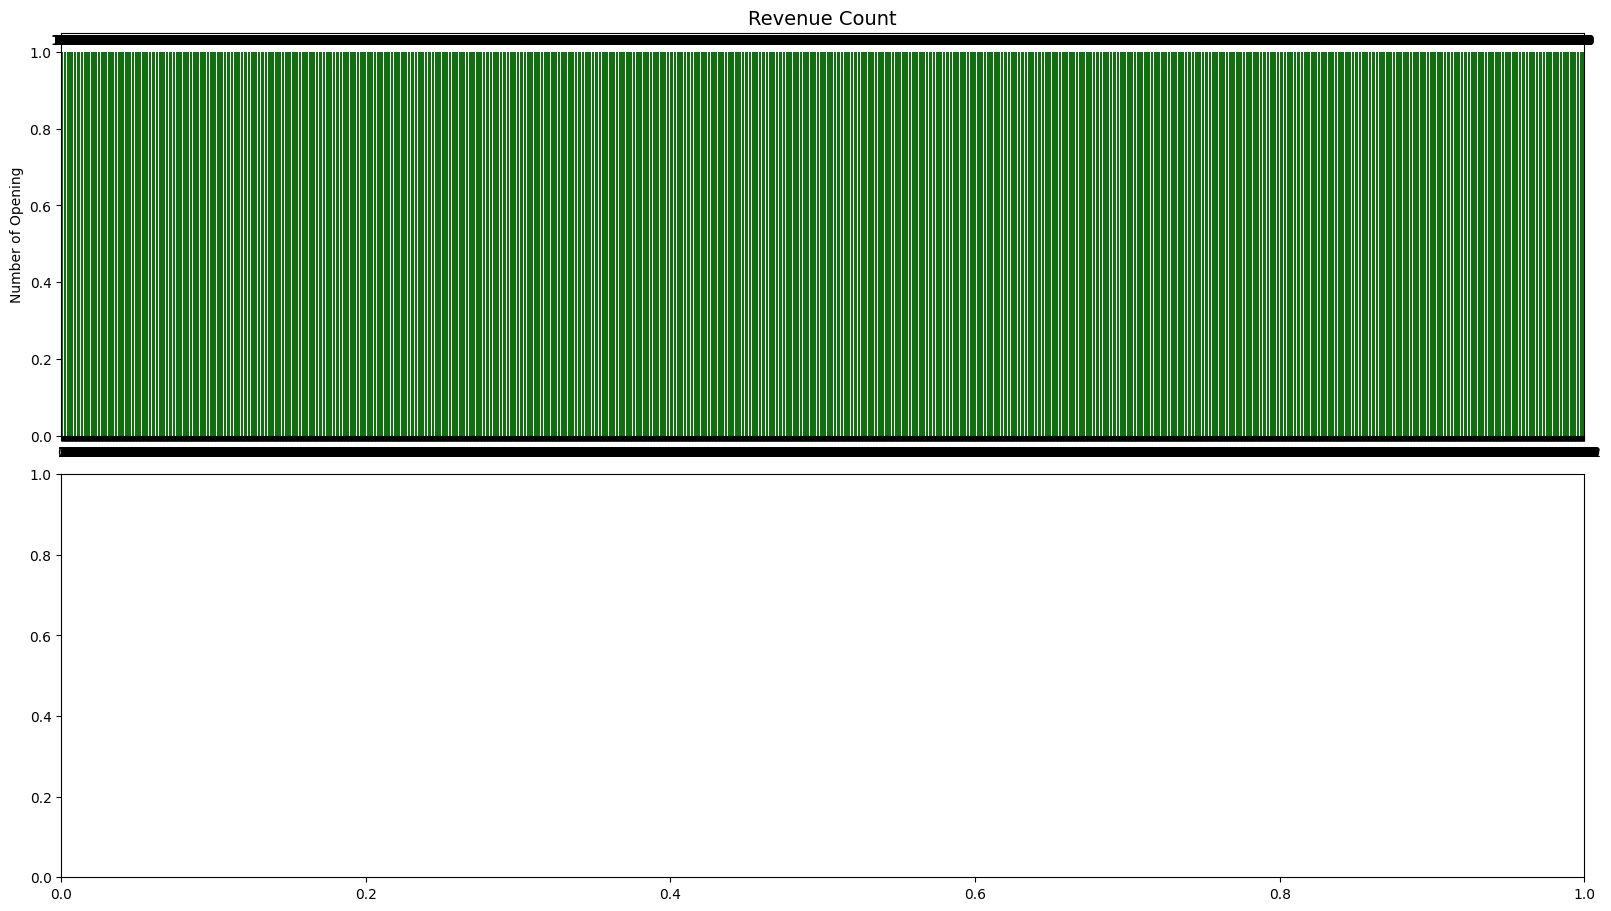

In [26]:
## years extraction
year = pd.DataFrame()
year["years"] = df_train["Opening Day of Restaurant"].dt.year
year = pd.concat([year,revenue],axis=1)

## revenue based on months
revenue_year = year.groupby("years")["Annual Turnover"].median()

### Visualization
fig, ax = plt.subplots(2,1,sharey=False,figsize=(16,9),constrained_layout=True)

bar_1 = sns.countplot(year["years"],ax=ax[0],color="green") ## Number of Revenue based on month
for i in bar_1.patches: #label each rectangle
    height = i.get_height()
    ax[0].text(i.get_x()+i.get_width()/2,height*1.02,height,ha="center",fontsize=10)
ax[0].set_title("Revenue Count",fontsize=14)
ax[0].set_ylabel("Number of Opening")

bar_2 = sns.barplot(revenue_year.index,revenue_year.values,ax=ax[1],color="red") ## Median Revenue
for i in bar_2.patches: #label each rectangle
    height = i.get_height()
    ax[1].text(i.get_x()+i.get_width()/2,height*1.02,height,ha="center",fontsize=11)
ax[1].set_title("Median Revenue",fontsize=14)
ax[1].set_ylabel("Revenue")

From the median revenue chart, we can see that year 2000 has the highest revenue while year 2013 has the lowest revenue. 

Two types of Quantitative data:

1. Discrete data: Numerical data that has specific values. A great example would be the number of dogs. The number of dogs  are counted as 1 dog, 2 dogs, 3 dogs. There is no such thing as 0.5 dog.
1. Continuous data: Numerical data that can take on any values. A great example would be the the height of a person. Donald is 6 foot or 182.88cm tall. 

In [27]:
## Discrete data
discrete_feats = [feat for feat in quantitative_feats if df_train[feat].nunique() <= 25]

discrete_feats

['Fire Audit',
 'Liquor License Obtained',
 'Situated in a Multi Complex',
 'Dedicated Parking',
 'Open Sitting Available',
 'Resturant Tier',
 'Restaurant Zomato Rating',
 'Restaurant City Tier',
 'Order Wait Time',
 'Staff Responsivness',
 'Value for Money',
 'Hygiene Rating',
 'Food Rating',
 'Overall Restaurant Rating',
 'Live Music Rating',
 'Comedy Gigs Rating',
 'Value Deals Rating',
 'Live Sports Rating',
 'Ambience',
 'Lively',
 'Service',
 'Comfortablility',
 'Privacy']

In [30]:
## Visualization
for feat in discrete_feats:
    plt.figure(constrained_layout=True)
    sns.scatterplot(df_train[feat],df_train["Annual Turnover"])

TypeError: scatterplot() takes from 0 to 1 positional arguments but 2 were given

<Figure size 640x480 with 0 Axes>

There's no obvious correlation between the discrete features with the revenue.

In [ ]:
## Continous Data
continuous_feats = [feat for feat in quantitative_feats if df_train[feat].nunique() > 25]

continuous_feats

It seems like this dataset doesn't contain continuous features.

### Categorical Data

In [ ]:
for feat in qualitative_feats:
    groupby_feat = df_train.groupby(feat)["revenue"].median()

    ## Visualization
    fig, ax = plt.subplots(2,1,figsize=(20,9),constrained_layout=True)
    bar_1 = sns.countplot(df_train[feat],ax=ax[0])
    for bar in bar_1.patches:
        height = bar.get_height()
        ax[0].text(bar.get_x()+bar.get_width()/2,height*1.02,height,ha="center")
    ax[0].set_title("Revenue Count ({})".format(feat))
    ax[0].set_ylabel("Count")
    ax[0].set_xticklabels(ax[0].get_xticklabels(),rotation=90)

    bar_2 = sns.barplot(groupby_feat.index,groupby_feat.values,ax=ax[1])
    for bar in bar_2.patches:
        height = bar.get_height()
        ax[1].text(bar.get_x()+bar.get_width()/2,height*1.02,height,ha="center")
    ax[1].set_title("Revenue based on {}".format(feat))
    ax[1].set_ylabel("Revenue")
    ax[1].set_xticklabels(ax[1].get_xticklabels(),rotation=90)
    


In the city variable visualization: 
* Elazig city has the highest median revenue while Kirklareli city has the lowest median revenue. 
* Istanbul and Ankara have 50 and 19 restaurant openings respectively, the rest of the cities have less than ten restaurant openings.

In the city group variable:
* Big cities have more restaurant openings compared to other city group.
* Big cities have higher revenue median compared to other city group.

In the type variable:
* Food court is the most popular restaurant type follow by inline and drive thru being the least popular.
* Inline restaurants have the highest median revenue compared to both drive thru and food court.

In [ ]:
## years extraction
year = pd.concat([year,df_train["City"]],axis=1)

## Select cities that has equal or more than 5 count of revenue
cities = ["İstanbul","Ankara","Bursa","İzmir","Samsun"]


## Visualization
fig, ax = plt.subplots(5,1,figsize=(25,35),constrained_layout=True)
for num,city in enumerate(cities):
    df_city = year.loc[year["City"] == city, :]
    df_city = df_city.sort_values("years")
    
    ## Line plot
    sns.lineplot(df_city["years"],df_city["revenue"],ax=ax[num],linestyle="-")
    ax[num].set_title(city)
    for label in ax[num].get_xticklabels():
        label.set_rotation(90)

### Missing Value
Check on the presence of missing value for the dataset

In [35]:
## missing value
print(df_train.isnull().any())

Annual Turnover                  False
Cuisine                          False
City                             False
Restaurant Location              False
Opening Day of Restaurant        False
Facebook Popularity Quotient      True
Endorsed By                      False
Instagram Popularity Quotient     True
Fire Audit                       False
Liquor License Obtained          False
Situated in a Multi Complex      False
Dedicated Parking                False
Open Sitting Available           False
Resturant Tier                    True
Restaurant Type                  False
Restaurant Theme                 False
Restaurant Zomato Rating         False
Restaurant City Tier             False
Order Wait Time                  False
Staff Responsivness              False
Value for Money                  False
Hygiene Rating                   False
Food Rating                      False
Overall Restaurant Rating         True
Live Music Rating                 True
Comedy Gigs Rating       

Great News ! Looks like we don't have presence of missing value. 

In [62]:
df_train=df_train.fillna(df_train.mean())
df_test=df_test.fillna(df_test.mean())


### Multicollinearity
Heatmap is an excellent way to check on the correclation between each independant variable.

<Axes: >

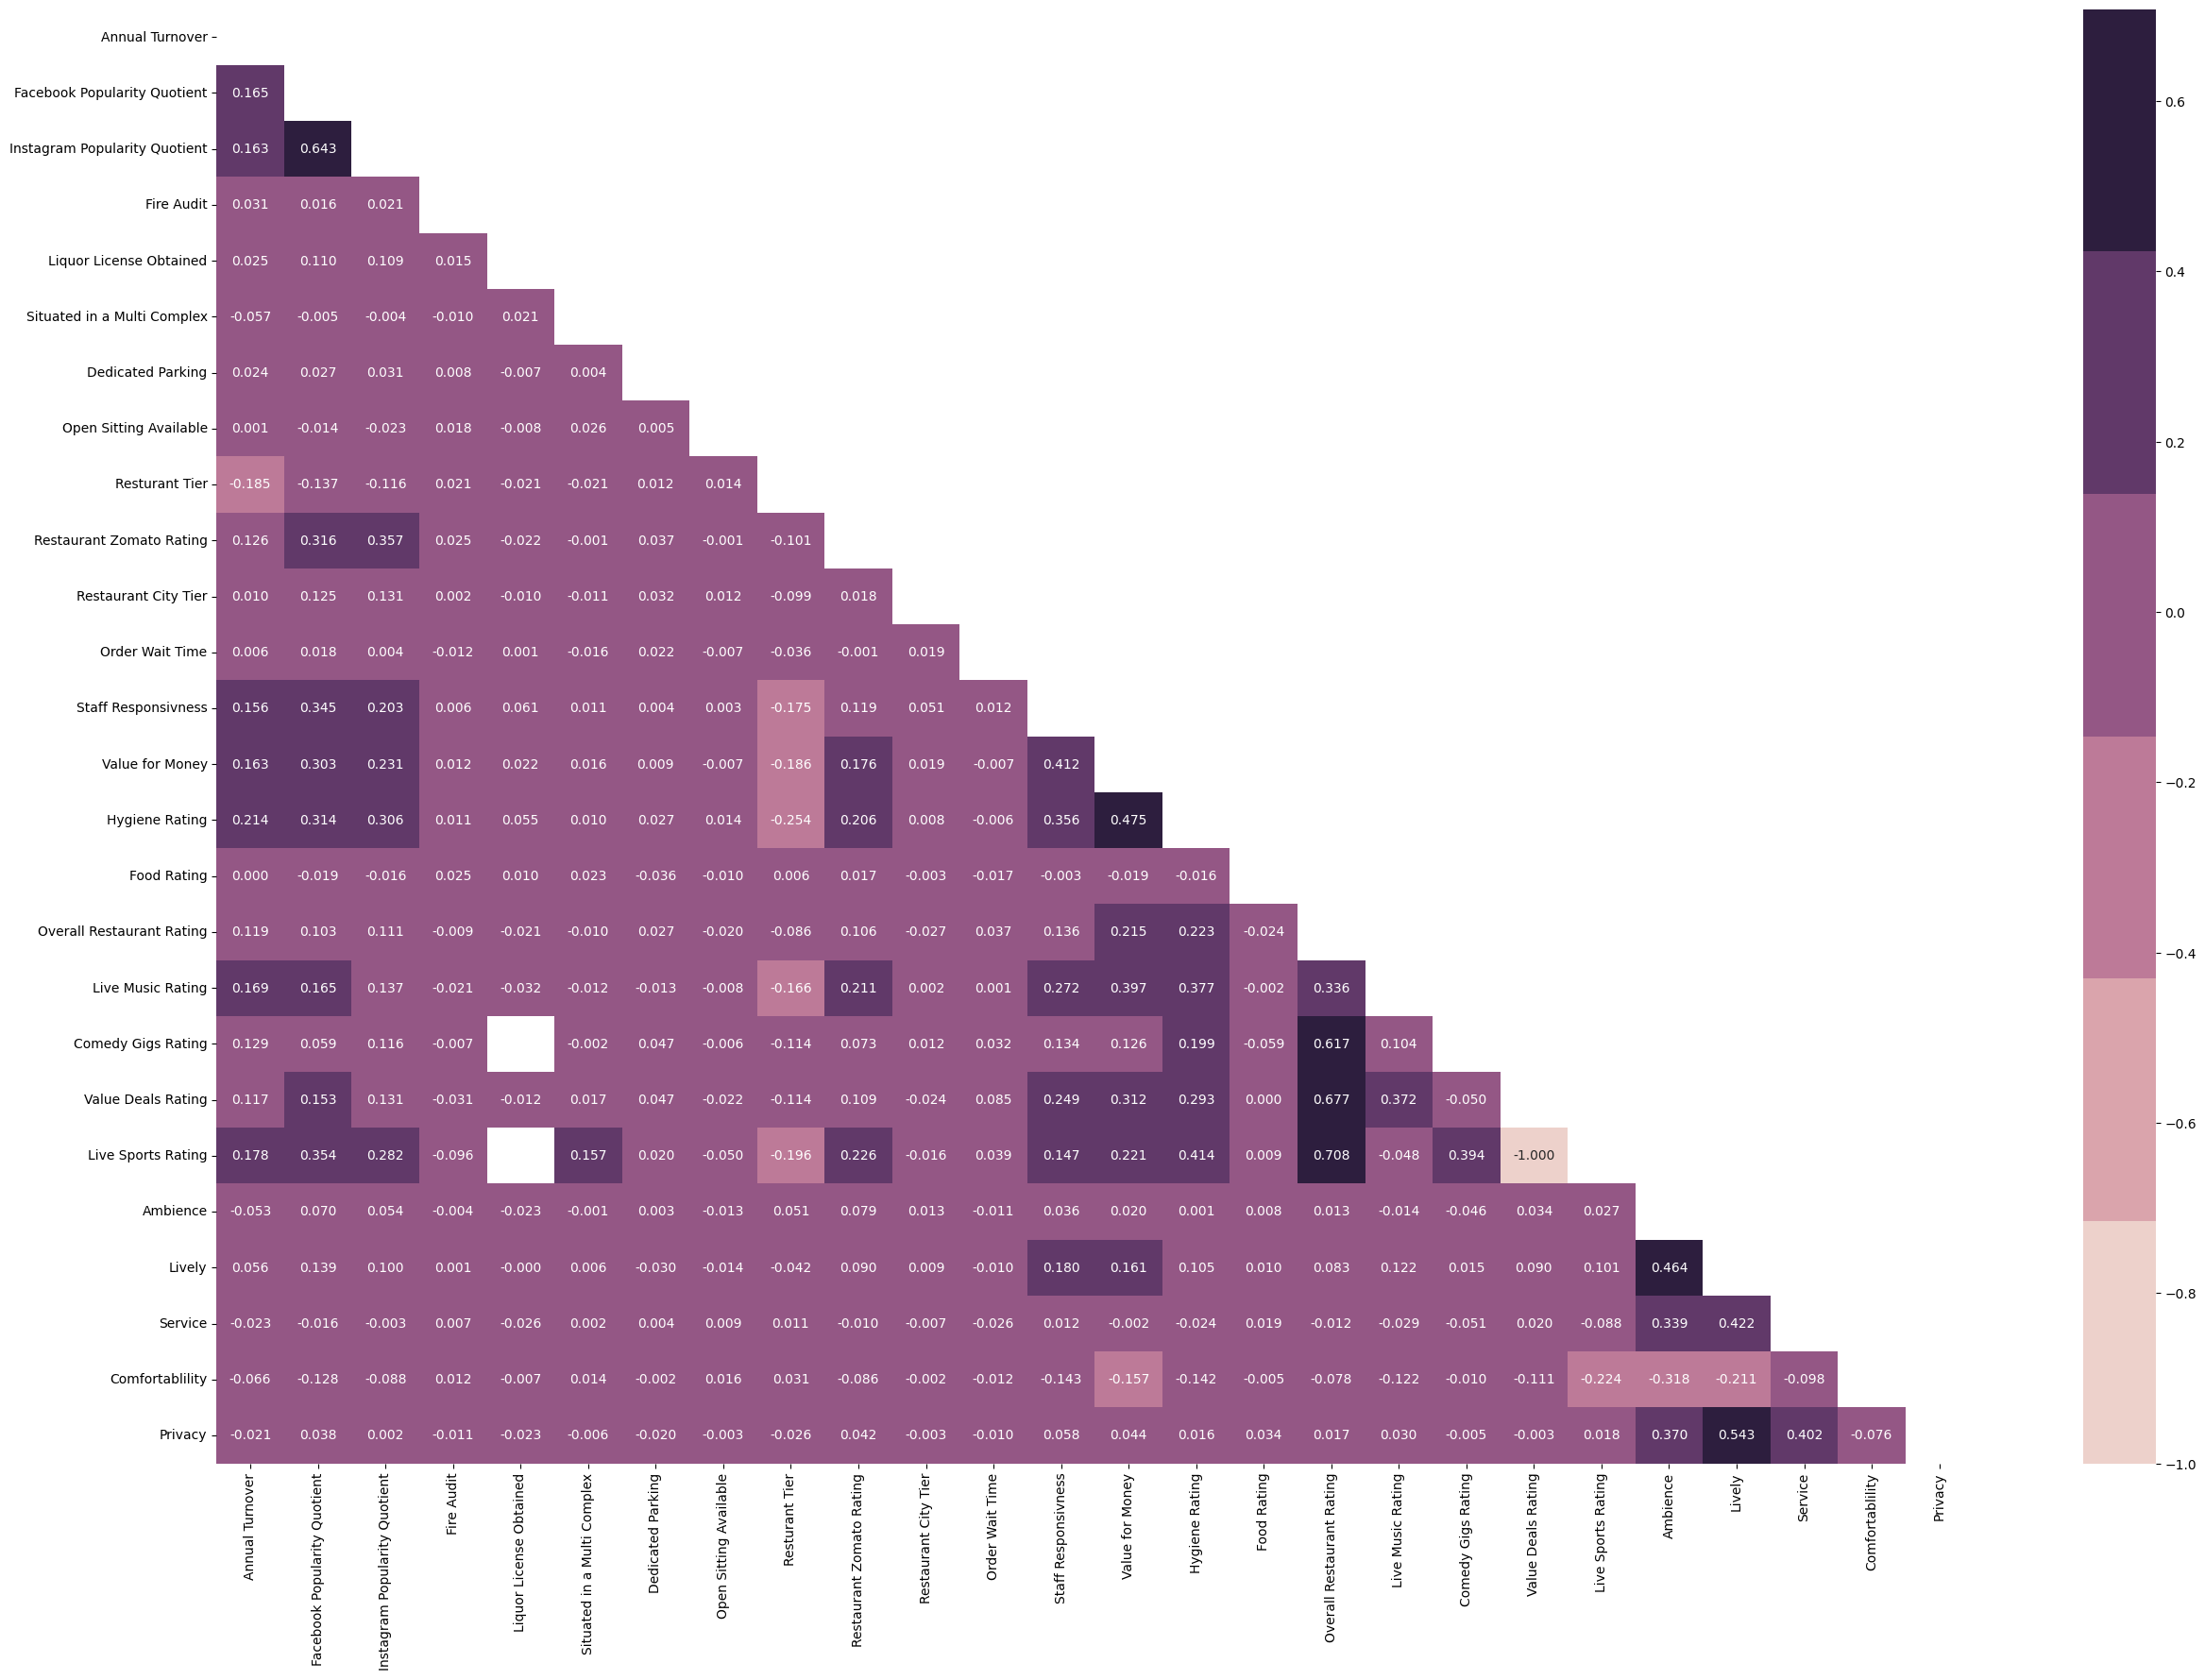

In [31]:
## Create a lower triangle heatmap
mask = np.zeros_like(df_train.corr(),dtype=bool)
mask[np.triu_indices_from(mask)] = True

## Heatmap visualization
plt.figure(figsize=(30,20))
sns.heatmap(df_train.corr(),
            annot=True,
            fmt=".3f",
            annot_kws = {"size":10},
            cmap=sns.cubehelix_palette(),
            mask=mask)

Multicollinearity is a problem because it undermines the statistical significance of an independent variable. As we can see from the heatmap, there are a lot of correlation between independant variables that have high similarity to each other. Code below check on the VIF(Variable Inflation Factors) of each feature.  

Variable Inflation Factors: VIF score of an independent variable represents how well the variable is explained by other independent variables. 
For more detail explanation on VIF, click [here](https://www.analyticsvidhya.com/blog/2020/03/what-is-multicollinearity/)

In [34]:
# Import library for VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    

    return(vif)

## Calcualte the VIF of the quantitaive features
vif = calc_vif(df_train[quantitative_feats])

## VIF exceeding 5 or 10 indicates high multicollinearity between this independent variable and the others
high_vif = vif[vif["VIF"] > 10].sort_values("VIF",ascending=False) # Threshold of 10 is used in this case

high_vif

MissingDataError: exog contains inf or nans

In [ ]:
## Percentage of high multicollinearity features in the dataset
print(len(high_vif)/df_train.shape[1])

85.71% of the features are highly multicollinearity ! 

Fixing multicollinearity on these features are impossible due the insufficient data description of these, p1,p2 ... to p37 features.

## Data Processing
Combine both train and test together for data processing

In [45]:
## dependant vairable 
y = df_train["Annual Turnover"]
df_train = df_train.drop("Annual Turnover",axis=1)

## combining
df_all = pd.concat([df_train,df_test],axis=0)

## drop the "Id" column
df_all = df_all.drop("Registration Number",axis=1)

## check on the shape
df_all.shape

KeyError: 'Annual Turnover'

### Imputing Missing Values
Check on the combined dataset for missing value as we only check for the train dataset only.

In [46]:
## Missing value
def missing_value(df):
    """ Takes in a dataframe and
    returns the number and percentage of the 
    missing value"""
    
    ## number of missing values
    number = df.isnull().sum().sort_values(ascending=False)
    number = number[number > 0]
    
    ## percentage of missing value
    percentage = df.isnull().sum()*100 /df.shape[0]
    percentage = percentage[percentage > 0].sort_values(ascending=False)
    
    return pd.concat([number,percentage],axis=1,keys=["Total","Percentage"])

missing_value(df_all)

,Total,Percentage
Live Sports Rating,3759,94.139745
Endoresed By,3493,87.478087
Registration Number,3493,87.478087
Value Deals Rating,3092,77.435512
Comedy Gigs Rating,2853,71.450038
Live Music Rating,867,21.712998
Endorsed By,500,12.521913
Overall Restaurant Rating,246,6.160781
Facebook Popularity Quotient,99,2.479339
Instagram Popularity Quotient,56,1.402454


Great ! Look's like there no missing values in the test dataset too.

## Normalization of Dependant Variable (revenue)

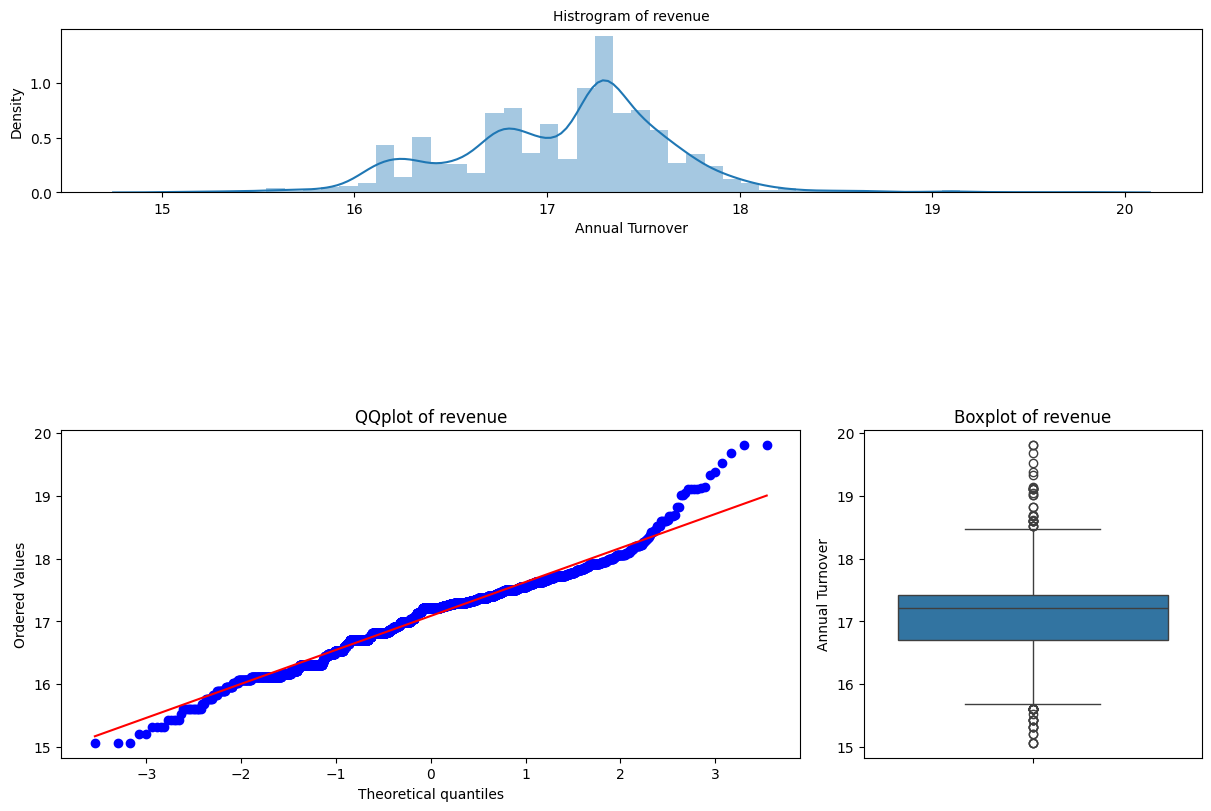

In [47]:
## import packages
import matplotlib.gridspec as gridspec
import scipy.stats as stats

## Visualization
fig = plt.figure(figsize=(12,8),constrained_layout=True)
grid = gridspec.GridSpec(ncols=3,nrows=4,figure=fig)
# Histrogram
ax1 = fig.add_subplot(grid[0,:])
sns.distplot(y,ax=ax1)
ax1.set_title("Histrogram of revenue",fontsize=10)

# Probability plot
ax2 = fig.add_subplot(grid[2:,:2])
stats.probplot(y,plot=ax2)
ax2.set_title("QQplot of revenue")

# Boxplot
ax3 = fig.add_subplot(grid[2:,2])
sns.boxplot(y,ax=ax3,orient="v")
ax3.set_title("Boxplot of revenue")

plt.show()


1. ****Skewness****: Defined as the degree of distortion from the symmetrical bell curve or the normal curve.
1. ****Kurtosis****: Defined as the measuer of the extreme values (also known as outliers) present in the distribution

In [48]:
## Check on the kurtosis and skewness of revenue
print("Kurtosis: {}".format(y.kurt()))
print("Skewness: {}".format(y.skew()))

Kurtosis: 1.0208962386065044
Skewness: -0.0958899808545094


The three grahps above show us:

* The revenue is drawn from a normal distribution
* The revenue is right skewed/ postively skewed, which indicates that most of the restaurants earn lesser.
* Present some outliers in revenue

As indicated in the three charts above, revenue is postively-skewed. revenue is drawn from a Leptokurtic (distributions with wider tails, greater profusion of outliers) distributions. 

Code below normalize the dependant variable.

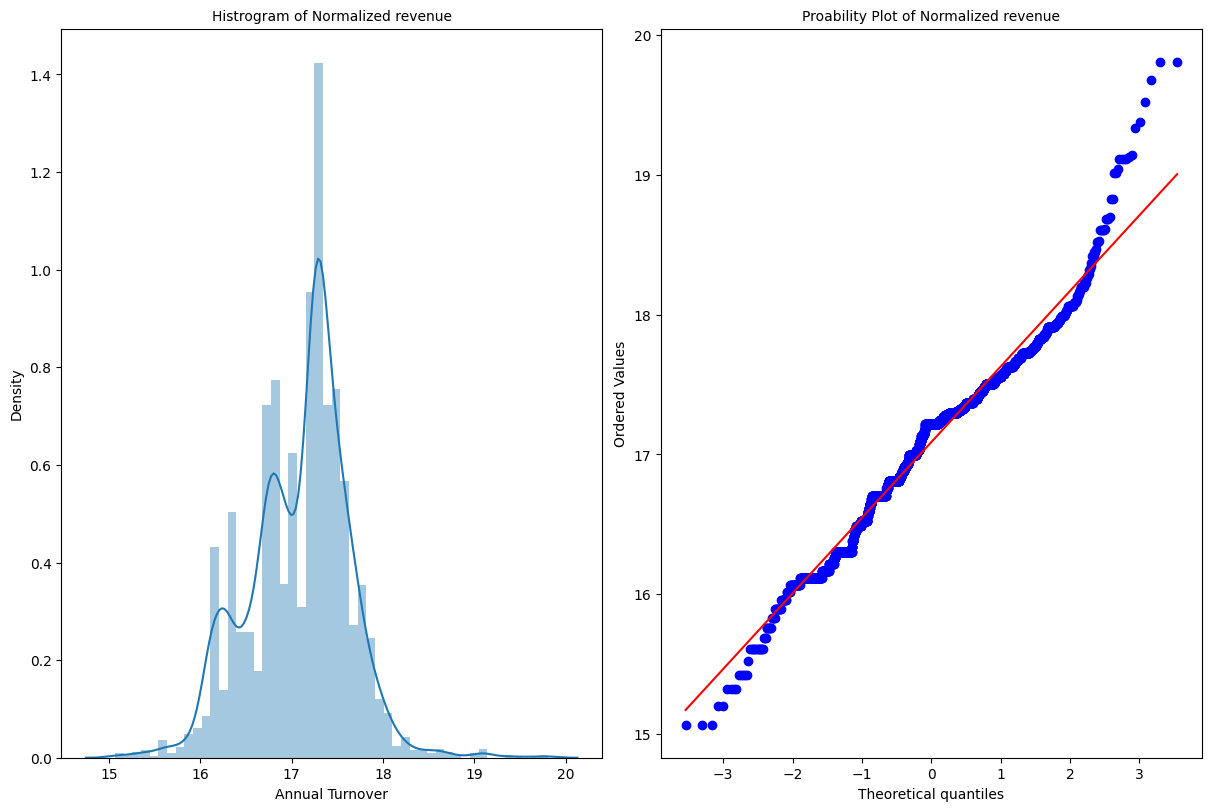

In [43]:
## Normalization
y = np.log1p(y)

## Visualization
fig, ax = plt.subplots(1,2,constrained_layout=True,figsize=(12,8))

## Histrogram
sns.distplot(y,ax=ax[0])
ax[0].set_title("Histrogram of Normalized revenue",fontsize=10)

## QQplot
stats.probplot(y,plot=ax[1])
ax[1].set_title("Proability Plot of Normalized revenue",fontsize=10)

plt.show()

In [ ]:
## Check on the normalized revenue kurtosis and skewness
print("Kurtosis: {}".format(y.kurt()))
print("Skewness: {}".format(y.skew()))

****Great!**** Our revenue feature has been normalized. 

## Adding New Features

In [ ]:
## OpenMonth
df_all["OpenMonth"] = df_all["Open Date"].transform(lambda x: int(x.split("/")[0]))

## OpenYear
df_all["OpenYear"] = df_all["Open Date"].transform(lambda x: int(x.split("/")[-1]))

## Open Day
df_all["Open Day"] = df_all["Open Date"].transform(lambda x: int(x.split("/")[1]))

## Remove Open Date
df_all = df_all.drop(["Open Date"],axis=1)

## Eliminating Biased Features

In [49]:
## Bias feature reducer
bias_feat = []
for feat in df_all.columns:
    counts = df_all[feat].value_counts().iloc[0] # mode value count
    if counts*100 / len(df_all) >99.94:
        bias_feat.append(feat)

bias_feat

[]

## Create Dummy Variables

In [50]:
## Dummy variable
df_all = pd.get_dummies(df_all).reset_index(drop=True)

In [51]:
## Split the dataset back into train and test dataset
n = len(y)

## train dataset
df_train = df_all[:n]

## test dataset
df_test = df_all[n:]

## Check on thier shapes
print("Shape of train dataset: {}".format(df_train.shape))
print("Shape of test dataset: {}".format(df_test.shape))

Shape of train dataset: (3493, 2641)
Shape of test dataset: (500, 2641)


## Model Building
### Train Test Split
The dataset are split into X_train,X_test, y_train, y_test.

In [52]:
## import necessary package
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

## Split the data into train and test set
X_train, X_test, y_train, y_test =  train_test_split(df_train,y,test_size=0.33,random_state=42)


## Check on the dataset shape
print("Shapes: ", X_train.shape, X_test.shape, y_train.shape, y_test.shape)

Shapes:  (2340, 2641) (1153, 2641) (2340,) (1153,)


## GridSearchCV Best Parameters for All Models

In [53]:
## create an empty list to contain all best models for later use
best_estimators = []

In [54]:
## import necessary packages
from sklearn.model_selection import GridSearchCV

## models packages
from sklearn.linear_model import Lasso, Ridge, ElasticNet, HuberRegressor, BayesianRidge
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor, VotingRegressor, AdaBoostRegressor, GradientBoostingRegressor, ExtraTreesRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
import lightgbm as lgbm

### Ridge 

In [57]:
## Parameters
params = {
    "alpha" : [.01, .1, .5, .7, .9, .95, .99, 1, 5, 10, 20],
    "fit_intercept" : [True, False],
    "solver" : ['svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga'],
    "tol" : [0.0001, 0.001, 0.01, 0.1],
    "random_state" : [42]
}

## Ridge
ridge = Ridge()
ridge_grid = GridSearchCV(ridge, params, scoring='r2', cv=7, n_jobs=-1)
ridge_grid.fit(X_train, y_train)

## Output
print("Best parameters:  {}:".format(ridge_grid.best_params_))
print("Best score: {}".format(ridge_grid.best_score_))

## Append to list
best_estimators.append(["Ridge",ridge_grid.best_estimator_])

ValueError: 
All the 3696 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3696 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\anirb\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\anirb\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_ridge.py", line 1126, in fit
    X, y = self._validate_data(
           ^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\anirb\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py", line 584, in _validate_data
    X, y = check_X_y(X, y, **check_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\anirb\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py", line 1106, in check_X_y
    X = check_array(
        ^^^^^^^^^^^^
  File "C:\Users\anirb\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py", line 921, in check_array
    _assert_all_finite(
  File "C:\Users\anirb\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py", line 161, in _assert_all_finite
    raise ValueError(msg_err)
ValueError: Input X contains NaN.
Ridge does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values


### Lasso

In [58]:
## Parameters
params = {
    'alpha' : [.01, .1, .5, .7, .9, .95, .99, 1, 5, 10, 20],
    'fit_intercept' : [True, False],
    'tol' : [0.0001, 0.001, 0.01, 0.1],
    "random_state" : [42]
}

## Lasso
lasso = Lasso()
lasso_grid = GridSearchCV(lasso, params, scoring='r2', cv=7, n_jobs=-1)
lasso_grid.fit(X_train, y_train)

## Output
print("Best parameters:  {}:".format(lasso_grid.best_params_))
print("Best score: {}".format(lasso_grid.best_score_))

## Append to list
best_estimators.append(["Lasso",lasso_grid.best_estimator_])

ValueError: 
All the 616 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
616 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\anirb\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\anirb\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_coordinate_descent.py", line 908, in fit
    X, y = self._validate_data(
           ^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\anirb\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py", line 584, in _validate_data
    X, y = check_X_y(X, y, **check_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\anirb\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py", line 1106, in check_X_y
    X = check_array(
        ^^^^^^^^^^^^
  File "C:\Users\anirb\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py", line 921, in check_array
    _assert_all_finite(
  File "C:\Users\anirb\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py", line 161, in _assert_all_finite
    raise ValueError(msg_err)
ValueError: Input X contains NaN.
Lasso does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values


### Elastic Net

In [ ]:
## Parameters
params = {
    "alpha" : [.01, .1, .5, .7, .9, .95, .99, 1, 5, 10, 20],
    "fit_intercept" : [True, False],
    "normalize" : [True,False],
    "tol" : [0.0001, 0.001, 0.01, 0.1],
    "random_state" : [42]
}

## Elastic Net
EL = ElasticNet()
EL_grid = GridSearchCV(EL, params, scoring='r2', cv=7, n_jobs=-1)
EL_grid.fit(X_train, y_train)

## Output
print("Best parameters:  {}:".format(EL_grid.best_params_))
print("Best score: {}".format(EL_grid.best_score_))

## Append to list
best_estimators.append(["ElasticNet",EL_grid.best_estimator_])

### HuberRegressor

In [59]:
## Parameters
params = {
    "alpha" : [.01, .1, .5, .7, .9, .95, .99, 1, 5, 10, 20],
    "fit_intercept" : [True, False],
    "tol" : [0.0001, 0.001, 0.01, 0.1],
    "max_iter": [100, 300 , 500]
}

## HuberRegressor
Huber_R = HuberRegressor()
Huber_R_grid = GridSearchCV(Huber_R, params, scoring='r2', cv=7, n_jobs=-1)
Huber_R_grid.fit(X_train, y_train)

## Output
print("Best parameters:  {}:".format(Huber_R_grid.best_params_))
print("Best score: {}".format(Huber_R_grid.best_score_))

## Append to list
best_estimators.append(["HuberRegressor",Huber_R_grid.best_estimator_])

ValueError: 
All the 1848 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1848 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\anirb\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\anirb\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_huber.py", line 297, in fit
    X, y = self._validate_data(
           ^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\anirb\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py", line 584, in _validate_data
    X, y = check_X_y(X, y, **check_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\anirb\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py", line 1106, in check_X_y
    X = check_array(
        ^^^^^^^^^^^^
  File "C:\Users\anirb\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py", line 921, in check_array
    _assert_all_finite(
  File "C:\Users\anirb\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py", line 161, in _assert_all_finite
    raise ValueError(msg_err)
ValueError: Input X contains NaN.
HuberRegressor does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values


### RandomForestRegressor

In [60]:
## Parameters
params = {
    "max_depth": ["None",10, 30, 50, 75, 100],
    "max_features": ["auto",0.3, 0.6],
    "min_samples_leaf": [1,3,5,7],
    "min_samples_split": [2, 4, 8, 12],
    "n_estimators": [30, 50, 100, 200],
    "random_state" : [42]
}

## RandomForestRegressor
RFR = RandomForestRegressor()
RFR_grid = GridSearchCV(RFR, params, scoring='r2', cv=7, n_jobs=-1)
RFR_grid.fit(X_train, y_train)

## Output
print("Best parameters:  {}:".format(RFR_grid.best_params_))
print("Best score: {}".format(RFR_grid.best_score_))

## Append to list
best_estimators.append(["RandomForestR",RFR_grid.best_estimator_])

ValueError: 
All the 8064 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1344 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\anirb\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\anirb\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\ensemble\_forest.py", line 340, in fit
    self._validate_params()
  File "C:\Users\anirb\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py", line 600, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\anirb\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\_param_validation.py", line 97, in validate_parameter_constraints
    raise InvalidParameterError(
sklearn.utils._param_validation.InvalidParameterError: The 'max_depth' parameter of RandomForestRegressor must be an int in the range [1, inf) or None. Got 'None' instead.

--------------------------------------------------------------------------------
6720 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\anirb\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\anirb\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\ensemble\_forest.py", line 345, in fit
    X, y = self._validate_data(
           ^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\anirb\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py", line 584, in _validate_data
    X, y = check_X_y(X, y, **check_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\anirb\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py", line 1106, in check_X_y
    X = check_array(
        ^^^^^^^^^^^^
  File "C:\Users\anirb\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py", line 921, in check_array
    _assert_all_finite(
  File "C:\Users\anirb\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py", line 161, in _assert_all_finite
    raise ValueError(msg_err)
ValueError: Input X contains NaN.
RandomForestRegressor does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values


### ExtraTreesRegressor

In [ ]:
## Parameters
params = {
    "max_depth": ["None",10, 30, 50, 75, 100],
    "max_features": ["auto",.3, .4, .5, .6],
    "min_samples_leaf": [1,3,5,7],
    "min_samples_split": [2, 4, 8, 12],
    "n_estimators": [30, 50, 100, 200],
    "random_state" : [42]
}

## ExtraTreesRegressor
ETR = ExtraTreesRegressor()
ETR_grid = GridSearchCV(ETR, params, scoring='r2', cv=7, n_jobs=-1)
ETR_grid.fit(X_train, y_train)

## Output
print("Best parameters:  {}:".format(ETR_grid.best_params_))
print("Best score: {}".format(ETR_grid.best_score_))

## Append to list
best_estimators.append(["ExtraTreesR",ETR_grid.best_estimator_])

### BaggingRegressor

In [ ]:
## Parameters
params = {
    "max_features": [0.2, 0.4, 0.6,1.0],
    "n_estimators": [5, 10, 15, 20],
    "random_state": [42]
}

## BaggingRegressor
BR =  BaggingRegressor()
BR_grid = GridSearchCV(BR, params, scoring='r2', cv=7, n_jobs=-1)
BR_grid.fit(X_train, y_train)

## Output
print("Best parameters:  {}:".format(BR_grid.best_params_))
print("Best score: {}".format(BR_grid.best_score_))

## Append to list
best_estimators.append(["BaggingRegressorR",BR_grid.best_estimator_])

### XGBoost Regressor

In [61]:
## parameters
params = {
    "learning_rate": [.1, .5, .7, .9, .95, .99, 1],
    "colsample_bytree": [.3, .4, .5, .6],
    "max_depth": [2, 4],
    "alpha": [1, 3, 5],
    "subsample": [.5],
    "n_estimators": [30, 70, 100, 200],
    "random_state" : [42]
}

## XGBoost Regressor
XGBR =  XGBRegressor()
XGBR_grid = GridSearchCV(XGBR, params, scoring='r2', cv=7, n_jobs=-1)
XGBR_grid.fit(X_train, y_train)

## Output
print("Best parameters:  {}:".format(XGBR_grid.best_params_))
print("Best score: {}".format(XGBR_grid.best_score_))

## Append to list
best_estimators.append(["XGBoostR",XGBR_grid.best_estimator_])

Best parameters:  {'alpha': 1, 'colsample_bytree': 0.3, 'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 200, 'random_state': 42, 'subsample': 0.5}:
Best score: 0.23466542435111432


### DecisionTreeRegressor

In [ ]:
## parameters
params = {
    "max_depth": ["None",10, 40, 80],
    "max_features": ["auto","sqrt","log2"],
    "min_samples_leaf": [1,3,5,7],
    "min_samples_split": [2, 6, 12],
    "random_state" : [42],
    "splitter" : ["best","random"]
}

## XGBoost Regressor
DTR =  DecisionTreeRegressor()
DTR_grid = GridSearchCV(DTR, params, scoring='r2', cv=7, n_jobs=-1)
DTR_grid.fit(X_train, y_train)

## Output
print("Best parameters:  {}:".format(DTR_grid.best_params_))
print("Best score: {}".format(DTR_grid.best_score_))

## Append to list
best_estimators.append(["DecisionTreeR",DTR_grid.best_estimator_])

### AdaBoostRegressor

In [ ]:
## parameters
params = {
    "n_estimators": [10, 30, 50, 100],
    "learning_rate": [.01, 0.1, 0.5, 0.9, 0.95, 1],
    "random_state" : [42]
}

## XGBoost Regressor
AdaBoostR =   AdaBoostRegressor()
AdaBoostR_grid = GridSearchCV(AdaBoostR, params, scoring='r2', cv=7, n_jobs=-1)
AdaBoostR_grid.fit(X_train, y_train)

## Output
print("Best parameters:  {}:".format(AdaBoostR_grid.best_params_))
print("Best score: {}".format(AdaBoostR_grid.best_score_))

## Append to list
best_estimators.append(["AdaBoostR",AdaBoostR_grid.best_estimator_])

### GradientBoostRegressor

In [ ]:
## Parameters
params = {
    "max_depth": [2, 3, 6, 10],
    "max_features": ["auto",0.3, 0.6],
    "min_samples_leaf": [1,3],
    "min_samples_split": [2, 5],
    "n_estimators": [30, 50, 100, 200],
    "random_state" : [42],
    "tol" : [0.0001, 0.001, 0.01, 0.1]
}

## GradientBoostingRegressor
GBR = GradientBoostingRegressor()
GBR_grid = GridSearchCV(GBR, params, scoring='r2', cv=7, n_jobs=-1)
GBR_grid.fit(X_train, y_train)

## Output
print("Best parameters:  {}:".format(GBR_grid.best_params_))
print("Best score: {}".format(GBR_grid.best_score_))

## Append to list
best_estimators.append(["GradientBoostR",GBR_grid.best_estimator_])

## Evaluate All Optimized Estimators


In [63]:
##import necessary packages
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

## pipeline
pipelines = []

for name,model in best_estimators:
    pipeline = Pipeline([("Scaler",StandardScaler()),
                         (name,model)
                        ])
    pipelines.append(["Scaled_"+name,pipeline])

In [65]:
## import packages
from sklearn.model_selection import KFold, cross_val_score

## Create a dataframe to store all the models' cross validation score
evaluate = pd.DataFrame(columns=["model","cv","std"])


## Encoded dataset
for name,model in pipelines:
    kfold = KFold(n_splits=10)
    cv = cross_val_score(model, X_train, y_train, cv=kfold, n_jobs=-1, scoring="neg_root_mean_squared_error")
    
    row = evaluate.shape[0]
    evaluate.loc[row,"model"] = name
    evaluate.loc[row,"cv"] = round(cv.mean(),3)
    evaluate.loc[row,"std"] = "+/- {}".format(round(cv.std(),4))
    
    evaluate = evaluate.sort_values("cv",ascending=False)

evaluate

,model,cv,std
0,Scaled_XGBoostR,-0.48,+/- 0.0248


TypeError: barplot() takes from 0 to 1 positional arguments but 2 positional arguments (and 2 keyword-only arguments) were given

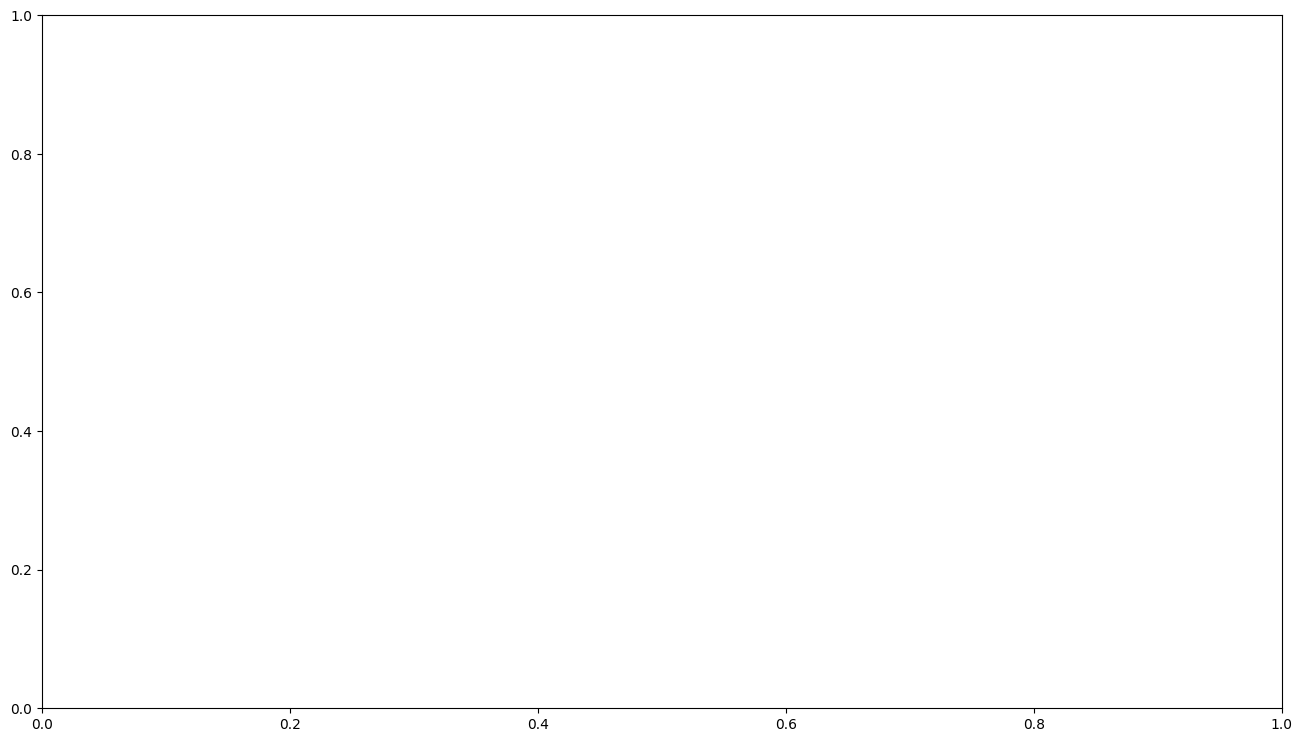

In [66]:
## Visualization
fig, ax = plt.subplots(1,1,sharey=False,figsize=(16,9))


bar = sns.barplot(evaluate["model"], evaluate["cv"],ax=ax,palette = sns.cubehelix_palette(evaluate.shape[0]))
for rec in bar.patches:
    height = rec.get_height()
    ax.text(rec.get_x() + rec.get_width()/2, height-0.02,height,ha="center")
ax.set_title("Cross Validate Score")
ax.set_xticklabels(ax.get_xticklabels(),rotation = 45)

From the chart above, models with the top 5 best negative rmse score are selected. All these models would be use in the ensemble VotingRegressor to further increase the cv score.

These models are:

* RandomForestRegressor
* AdaBoostRegressor
* ExtraTreesRegressor
* BaggingRegressor
* GradientBoostRegressor

### Ensemble Models with VotingRegressor
A voting regressor is an ensemble meta-estimator that fits several base regressors, each on the whole dataset. Then it averages the individual predictions to form a final prediction

Note: VotingRegressor works well with models that are not identical, for example: ExtraTreesRegressor with AdaBoostRegressor. ExtraTreesRegressor and RandomTreesRegressor are highly identifical so we would just pick the one with a higher cv score (in this case RandomForestRegressor) 

So we gonna use just these 4 models :

* RandomForestRegressor
* AdaBoostRegressor
* BaggingRegressor
* GradientBoostRegressor

In [ ]:
## Creating a list for all combinations models
votings = []

## RandomForestRegressor only, Current best model
votings.append(["Scaled_RFR",RFR_grid.best_estimator_])


##  All models
votings.append(("Scaled_all_models",Pipeline([("Scaler",StandardScaler()),
                                      ("Votings",VotingRegressor([("RFR",RFR_grid.best_estimator_),
                                                                  ("AdaBoostR", AdaBoostR_grid.best_estimator_),
                                                                  ("BaggingR",BR_grid.best_estimator_),
                                                                  ("GBR",GBR_grid.best_estimator_)
                                                                 ])
                                    
                                    )])))


### Combinations of three estimators

## Combination of RandomForestRegressor with  BaggingRegressor & GradientBoostRegressor
votings.append(("Scaled_RFR_BR_GBR",Pipeline([("Scaler",StandardScaler()),
                                      ("Votings",VotingRegressor([("RFR",RFR_grid.best_estimator_),
                                                                  ("BaggingR",BR_grid.best_estimator_),
                                                                  ("GBR",GBR_grid.best_estimator_)
                                                                 ])
                                    
                                    )])))

## Combination of RandomForestRegressor with BaggingRegressor & AdaBoostRegressor 
votings.append(("Scaled_RFR_BR_AdaBR",Pipeline([("Scaler",StandardScaler()),
                                      ("Votings",VotingRegressor([("RFR",RFR_grid.best_estimator_),
                                                                  ("BaggingR",BR_grid.best_estimator_),
                                                                  ("AdaBoostR", AdaBoostR_grid.best_estimator_)
                                                                 ])
                                    
                                    )])))

## Combination of RandomForestRegressor with AdaBoostRegressor  & GradientBoostRegressor 
votings.append(("Scaled_AdaBR_GBR",Pipeline([("Scaler",StandardScaler()),
                                      ("Votings",VotingRegressor([("RFR",RFR_grid.best_estimator_),
                                                                  ("AdaBoostR", AdaBoostR_grid.best_estimator_),
                                                                  ("GBR",GBR_grid.best_estimator_)
                                                                 ])
                                    
                                    )])))

## Combination of BaggingRegressor with GradientBoostRegressor & AdaBoostRegressor
votings.append(("Scaled_BR_GBR_AdaBR",Pipeline([("Scaler",StandardScaler()),
                                      ("Votings",VotingRegressor([("BaggingR",BR_grid.best_estimator_),
                                                                  ("GBR",GBR_grid.best_estimator_),
                                                                  ("AdaBoostR", AdaBoostR_grid.best_estimator_)
                                                                 ])
                                    
                                    )])))

### Combination of 2 estimators

## Combination of BaggingRegressor with GradientBoostRegressor
votings.append(("Scaled_BR_GBR",Pipeline([("Scaler",StandardScaler()),
                                      ("Votings",VotingRegressor([("BaggingR",BR_grid.best_estimator_),
                                                                  ("GBR",GBR_grid.best_estimator_)
                                                                 ])
                                    
                                    )])))

## Combination of BaggingRegressor with AdaBoostRegressor
votings.append(("Scaled_BR_AdaBR",Pipeline([("Scaler",StandardScaler()),
                                      ("Votings",VotingRegressor([("BaggingR",BR_grid.best_estimator_),
                                                                  ("AdaBoostR", AdaBoostR_grid.best_estimator_)
                                                                 ])
                                    
                                    )])))

## Combination of BaggingRegressor with RandomForestRegressor
votings.append(("Scaled_BR_RFR",Pipeline([("Scaler",StandardScaler()),
                                      ("Votings",VotingRegressor([("BaggingR",BR_grid.best_estimator_),
                                                                  ("RFR",RFR_grid.best_estimator_)
                                                                 ])
                                    
                                    )])))

## Combination of GradientBoostRegressor with AdaBoostRegressor
votings.append(("Scaled_GBR_AdaBR",Pipeline([("Scaler",StandardScaler()),
                                      ("Votings",VotingRegressor([("GBR",GBR_grid.best_estimator_),
                                                                  ("AdaBoostR", AdaBoostR_grid.best_estimator_)
                                                                 ])
                                    
                                    )])))

## Combination of GradientBoostRegressor with RandomForestRegressor
votings.append(("Scaled_GBR_RFR",Pipeline([("Scaler",StandardScaler()),
                                      ("Votings",VotingRegressor([("GBR",GBR_grid.best_estimator_),
                                                                  ("RFR",RFR_grid.best_estimator_)
                                                                 ])
                                    
                                    )])))

## Combination of AdaBoostRegressor with RandomForestRegressor
votings.append(("Scaled_AdaBR_RFR",Pipeline([("Scaler",StandardScaler()),
                                      ("Votings",VotingRegressor([("AdaBoostR", AdaBoostR_grid.best_estimator_),
                                                                  ("RFR",RFR_grid.best_estimator_)
                                                                 ])
                                    
                                    )])))

In [ ]:
## Create dataframe for the cross validate score
evaluate_vote = pd.DataFrame(columns=["model","cv","std"])

## Fitting all the combination models
for name, model in votings:
    kfold = KFold(n_splits=10,random_state=42)
    
    cv = cross_val_score(model,X_train,y_train, cv=kfold, scoring="neg_root_mean_squared_error",n_jobs=-1)
    
    row = evaluate_vote.shape[0]
    
    evaluate_vote.loc[row,"model"] = name
    evaluate_vote.loc[row,"cv"] = round(cv.mean(),4)
    evaluate_vote.loc[row,"std"] = "+- {}".format(round(cv.std(),5))
    
evaluate_vote = evaluate_vote.sort_values("cv",ascending=False)
evaluate_vote

In [ ]:
## Visualization
fig, ax = plt.subplots(1,1,figsize=(16,9))
bar = sns.barplot(evaluate_vote["model"],evaluate_vote["cv"],ax=ax,palette = sns.cubehelix_palette(evaluate.shape[0]))

for rec in bar.patches:
    height = rec.get_height()
    ax.text(rec.get_x() + rec.get_width() /2, height *1.02, height, ha="center")
ax.set_title("Cross Validate Score",fontsize=14)
ax.set_xticklabels(evaluate_vote["model"].to_list(),rotation=45)

It seems like RandomForestRegressor with standardized dataset perform the best compared to all of the ensemble estimators. We will use RandomForestRegressor estimator to predict the test dataset for our submission.

## Submission

In [ ]:
## Best Model : Scaled_RFR
best_model = Pipeline([("Scaler",StandardScaler()),
                       ("RFR",RFR_grid.best_estimator_)
                      ])
## Fit the model 
best_model = best_model.fit(df_train,y) # fit the model with all the train dataset

## Submission
submission = pd.read_csv("/kaggle/input/restaurant-revenue-prediction/sampleSubmission.csv")
submission.iloc[:,1] = np.floor(np.expm1(best_model.predict(df_test)))
submission.to_csv('submission', index=False)
submission

### It's been my pleasure to share my notebook with you.
### If this notebook do helped you in any way, please hit that "upvote" button. Thank you !